In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 8)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [3]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet

In [4]:
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range = 30,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)  # this is for normalization, basically to shorten the range
val_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('/kaggle/input/dogs-cats-images/dataset/training_set',
                                                   target_size=(img_size, img_size),
                                                   batch_size=batch_size,
                                                   shuffle=True,  # shuffle the images in every iteration
                                                   class_mode='binary')

val_generator = val_datagen.flow_from_directory('/kaggle/input/dogs-cats-images/dataset/test_set',
                                                   target_size=(img_size, img_size),
                                                   batch_size=batch_size,
                                                   shuffle=False,
                                                   class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Visulization of 15 Random Samples from a Batch of 32

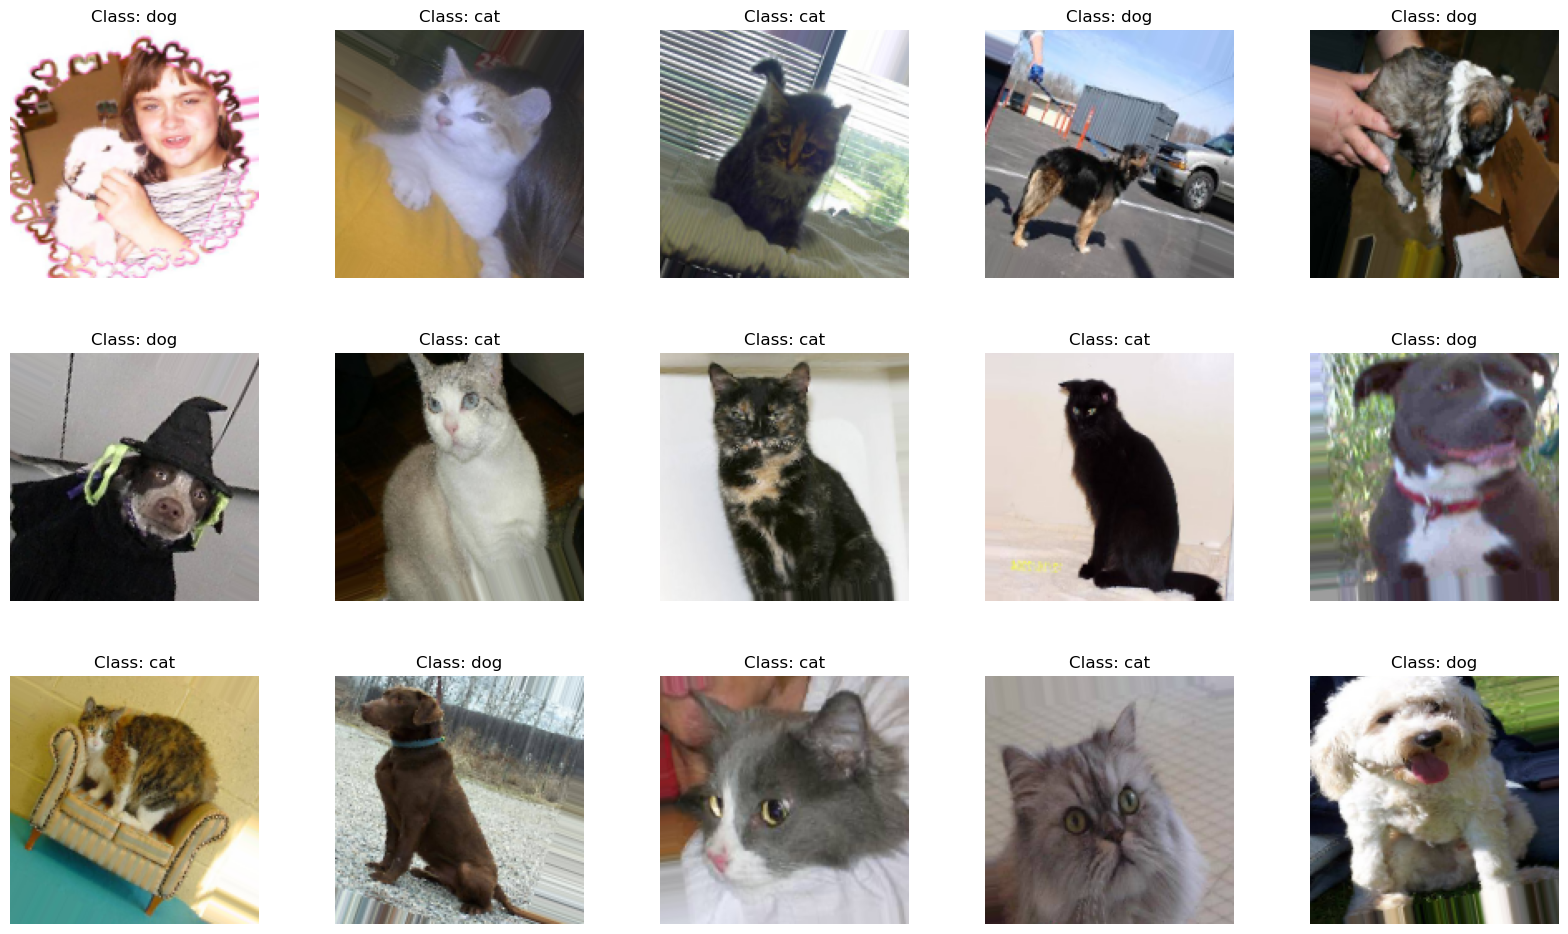

In [5]:
labels = ['cat','dog']
samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20 , 20))
for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer

In [7]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
filepath= "model_cnn.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

In [13]:
history = model.fit(train_generator,epochs=5,
                    validation_data=val_generator,
                    callbacks=[checkpoint])

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.7167 - accuracy: 0.5229
Epoch 1: val_loss improved from inf to 0.68756, saving model to model_cnn.h5
250/250 [==============================] - 109s 401ms/step - loss: 0.7167 - accuracy: 0.5229 - val_loss: 0.6876 - val_accuracy: 0.5100
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0.6139
Epoch 2: val_loss improved from 0.68756 to 0.62679, saving model to model_cnn.h5
250/250 [==============================] - 75s 302ms/step - loss: 0.6567 - accuracy: 0.6139 - val_loss: 0.6268 - val_accuracy: 0.6555
Epoch 3/5
250/250 [==============================] - ETA: 0s - loss: 0.6128 - accuracy: 0.6645
Epoch 3: val_loss improved from 0.62679 to 0.60173, saving model to model_cnn.h5
250/250 [==============================] - 75s 300ms/step - loss: 0.6128 - accuracy: 0.6645 - val_loss: 0.6017 - val_accuracy: 0.6790
Epoch 4/5
250/250 [==============================] - ETA: 0s - loss: 0.58

LEARNING CURVES
If the difference between the validation loss and training loss is too big then your model is overfitting

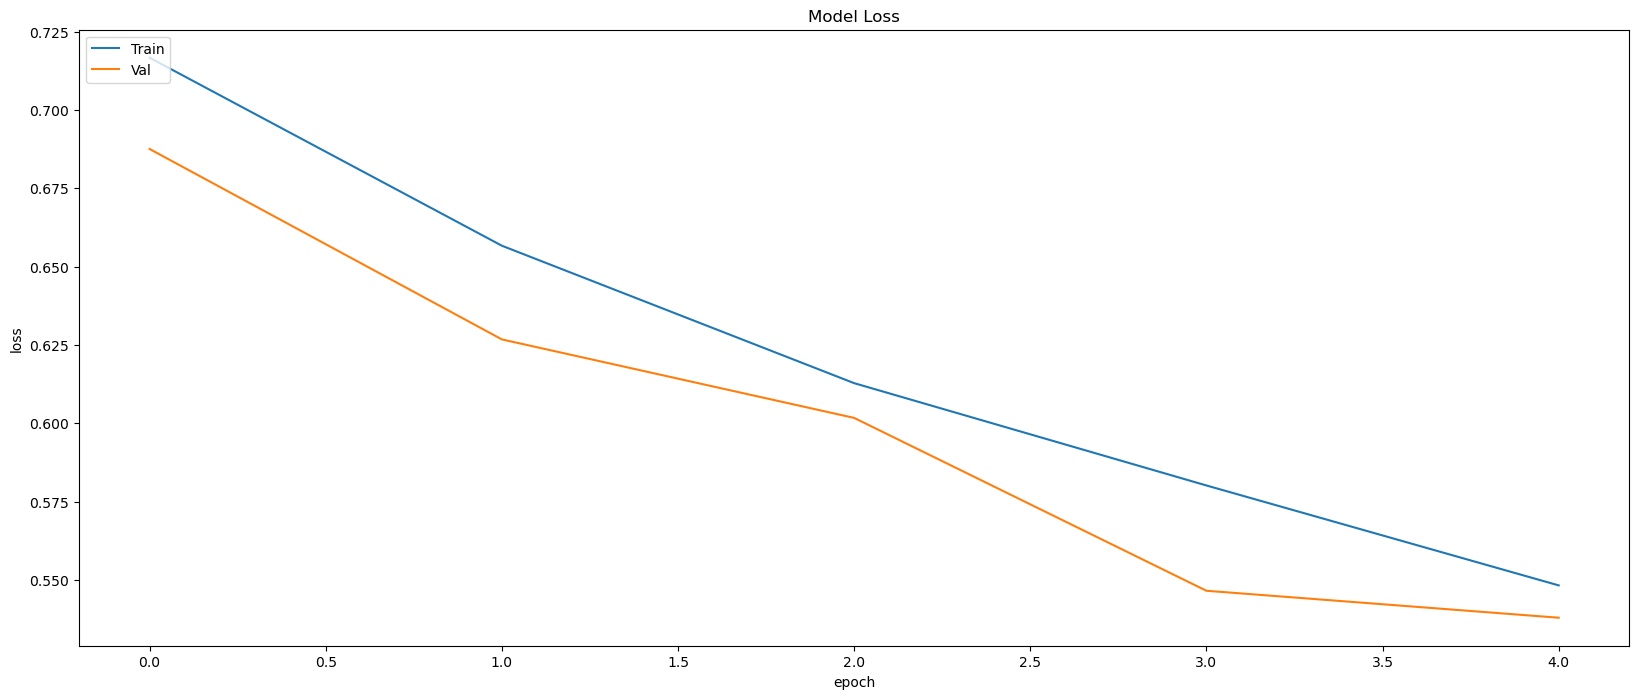

In [14]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

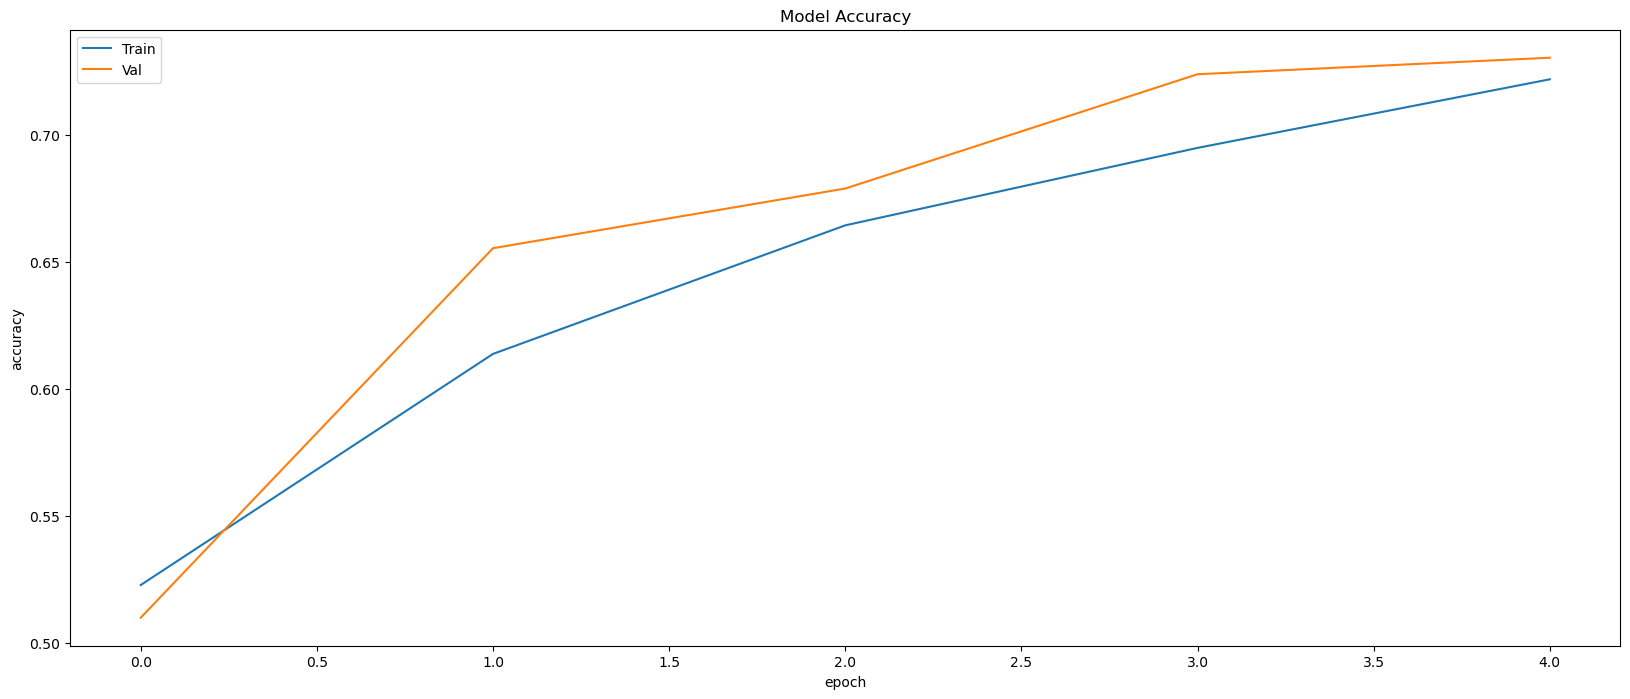

In [15]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [16]:
model = tf.keras.models.load_model('/kaggle/working/model_cnn.h5')

In [17]:
y_test = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_probs = y_pred.copy()

63/63 [==============================] - 7s 109ms/step


In [18]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test,y_pred,target_names = ['cats','dogs']))

              precision    recall  f1-score   support

        cats       0.76      0.67      0.71      1000
        dogs       0.70      0.79      0.75      1000

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



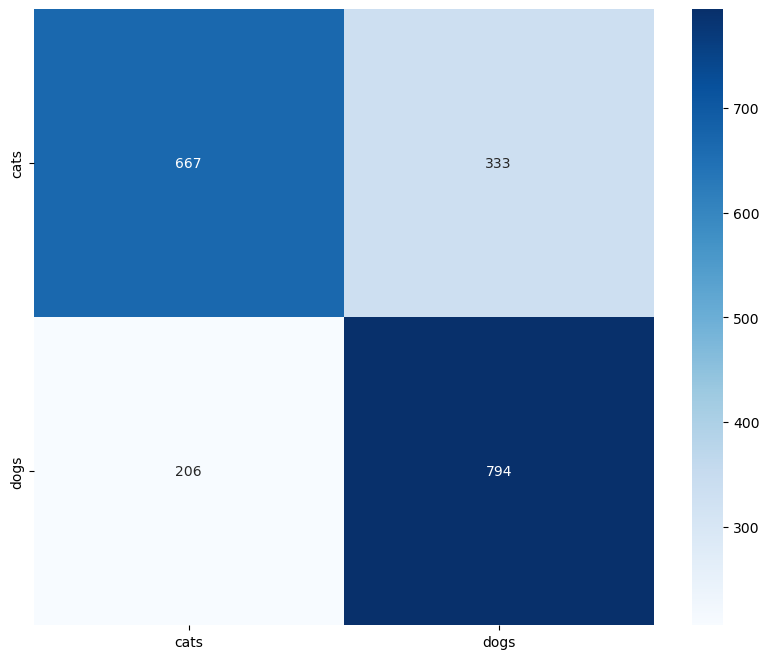

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['cats','dogs'],
            yticklabels=['cats','dogs'],cmap='Blues')
plt.show()

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

In [24]:
roc_auc
# 0.5 - 1 range

0.809478

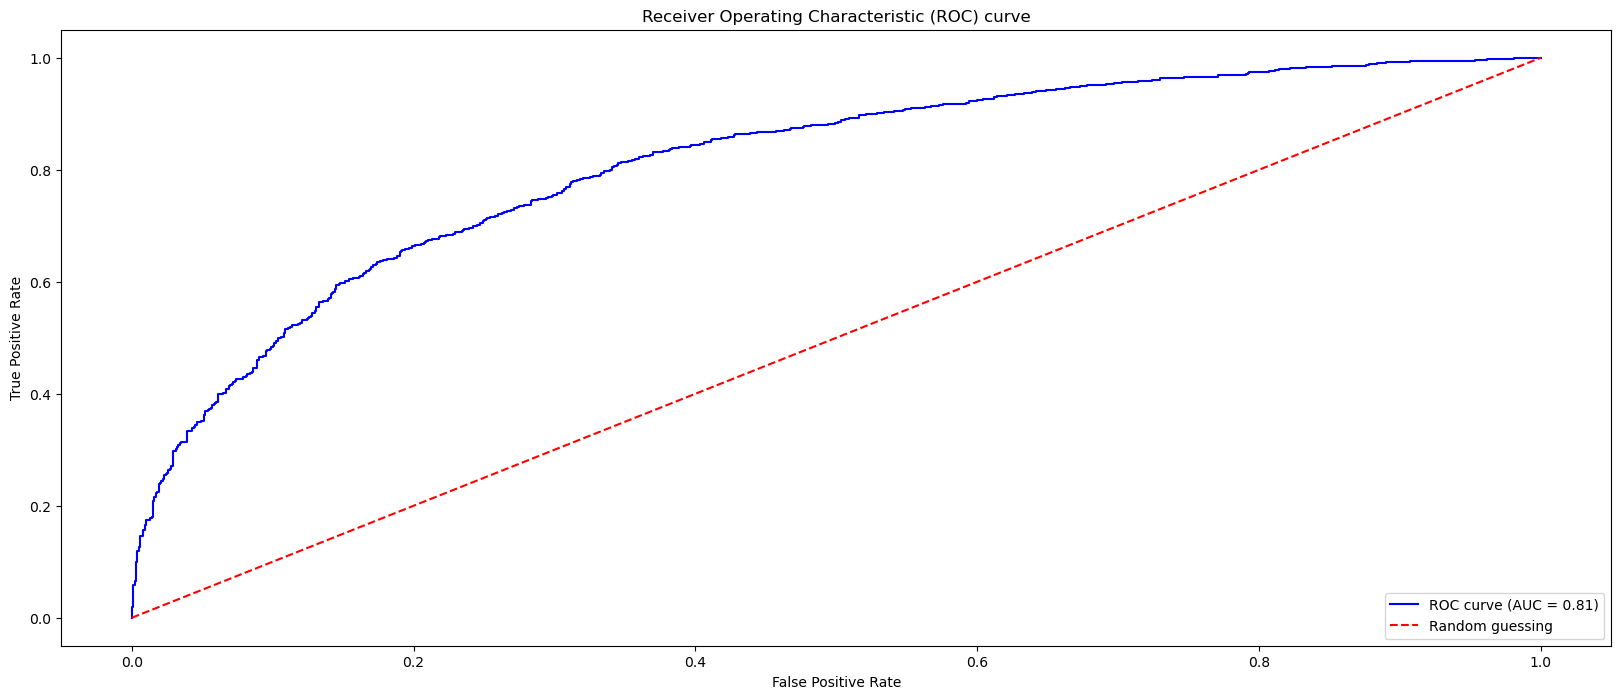

In [25]:
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

USING PRE TRAINED MODELS